# **Graph analysis**

## Imports

In [25]:
import os
import pickle
import networkx as nx
import matplotlib.pyplot as plt
import forceatlas2
import networkx.algorithms.community as nx_comm

## Helper functions

In [26]:
def load_checkpoint(filename):
    if os.path.exists(filename):
        with open(filename, 'rb') as f:
            return pickle.load(f)
    return None

## Load data

In [27]:
data_cleaned = load_checkpoint('data_final_cleaned_depth_2.pkl')
graph_cleaned = data_cleaned['graph']
node_attributes = data_cleaned['node_attributes']
G = nx.Graph(graph_cleaned)
nx.set_node_attributes(G, node_attributes)

data_cleaned_depth_3 = load_checkpoint('data_final_cleaned_depth_3.pkl')
graph_cleaned_depth_3 = data_cleaned_depth_3['graph']
node_attributes_depth_3 = data_cleaned_depth_3['node_attributes']
G_depth_3 = nx.Graph(graph_cleaned_depth_3)
nx.set_node_attributes(G_depth_3, node_attributes_depth_3)

## Data and graph information

In [28]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
num_nodes, num_edges

(825, 6267)

In [29]:
num_nodes = G_depth_3.number_of_nodes()
num_edges = G_depth_3.number_of_edges()
num_nodes, num_edges

(12971, 83012)

In [30]:
top_neighbors = {}
max_neighbors = 0
for artist_name in G.nodes():
    num_neighbors = len(list(G.neighbors(artist_name)))
    top_neighbors[artist_name] = num_neighbors

print("Artist with most neighbors:", max(top_neighbors, key=top_neighbors.get), "with", max(top_neighbors.values()), "neighbors")
print("Second artist with most neighbors:", sorted(top_neighbors, key=top_neighbors.get, reverse=True)[1], "with", sorted(top_neighbors.values(), reverse=True)[1], "neighbors")
print("Third artist with most neighbors:", sorted(top_neighbors, key=top_neighbors.get, reverse=True)[2], "with", sorted(top_neighbors.values(), reverse=True)[2], "neighbors")
print("Fourth artist with most neighbors:", sorted(top_neighbors, key=top_neighbors.get, reverse=True)[3], "with", sorted(top_neighbors.values(), reverse=True)[3], "neighbors")

Artist with most neighbors: Lil Wayne with 133 neighbors
Second artist with most neighbors: Future with 119 neighbors
Third artist with most neighbors: Ty Dolla $ign with 118 neighbors
Fourth artist with most neighbors: 2 Chainz with 100 neighbors


In [31]:
top_neighbors = {}
max_neighbors = 0
for artist_name in G_depth_3.nodes():
    num_neighbors = len(list(G_depth_3.neighbors(artist_name)))
    top_neighbors[artist_name] = num_neighbors

print("Artist with most neighbors:", max(top_neighbors, key=top_neighbors.get), "with", max(top_neighbors.values()), "neighbors")
print("Second artist with most neighbors:", sorted(top_neighbors, key=top_neighbors.get, reverse=True)[1], "with", sorted(top_neighbors.values(), reverse=True)[1], "neighbors")
print("Third artist with most neighbors:", sorted(top_neighbors, key=top_neighbors.get, reverse=True)[2], "with", sorted(top_neighbors.values(), reverse=True)[2], "neighbors")
print("Fourth artist with most neighbors:", sorted(top_neighbors, key=top_neighbors.get, reverse=True)[3], "with", sorted(top_neighbors.values(), reverse=True)[3], "neighbors")

Artist with most neighbors: Snoop Dogg with 378 neighbors
Second artist with most neighbors: Ty Dolla $ign with 310 neighbors
Third artist with most neighbors: Rick Ross with 303 neighbors
Fourth artist with most neighbors: Lil Wayne with 299 neighbors


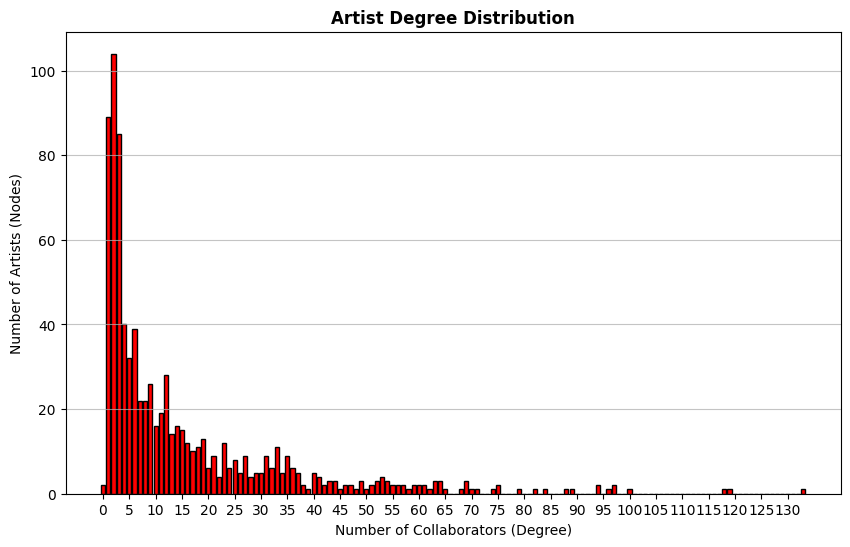

In [32]:
degree_counts = nx.degree_histogram(G)
degrees = range(len(degree_counts))

plt.figure(figsize=(10, 6))
plt.bar(degrees, degree_counts, color='red', edgecolor='black')
plt.title('Artist Degree Distribution', fontweight='bold')
plt.xlabel('Number of Collaborators (Degree)')
plt.ylabel('Number of Artists (Nodes)')
plt.xticks(range(0, len(degrees), 5))
plt.grid(axis='y', alpha=0.75)
plt.show()

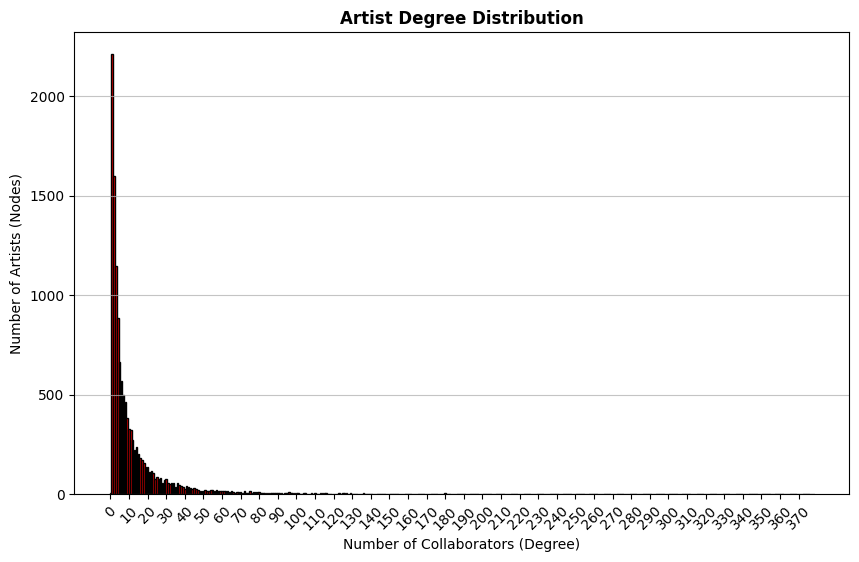

In [33]:
degree_counts = nx.degree_histogram(G_depth_3)
degrees = range(len(degree_counts))

plt.figure(figsize=(10, 6))
plt.bar(degrees, degree_counts, color='red', edgecolor='black')
plt.title('Artist Degree Distribution', fontweight='bold')
plt.xlabel('Number of Collaborators (Degree)')
plt.ylabel('Number of Artists (Nodes)')
plt.xticks(range(0, len(degrees), 10), rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

## Communities

(np.float64(-2996.8122969383458),
 np.float64(2552.0023551748704),
 np.float64(-1015.6989633516348),
 np.float64(1600.6070856084111))

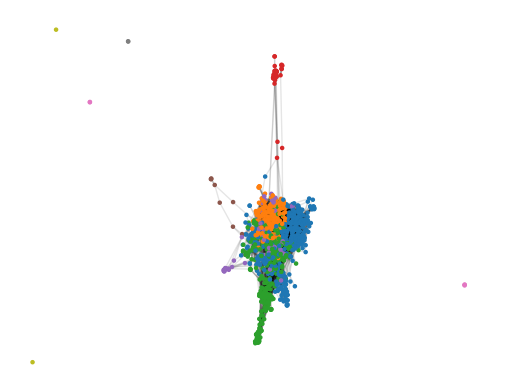

In [35]:
pos_array = forceatlas2.forceatlas2(nx.to_numpy_array(G))
pos_subgraph = {node: pos_array[i] for i, node in enumerate(G.nodes())}

sorted_communities = sorted(nx_comm.louvain_communities(G), key=len, reverse=True)
top_n = len(sorted_communities)

node_to_community = {}
for i, comm in enumerate(sorted_communities):
    for node in comm:
        node_to_community[node] = i


top_n += 1
cmap = plt.colormaps.get_cmap('tab10')
colors = [cmap(i / top_n) for i in range(top_n)]

node_colors = []
for node in G.nodes():
    community_index = node_to_community.get(node, -1)
    if community_index != -1 and community_index <= top_n:
        node_colors.append(colors[community_index])
    else:
        node_colors.append('lightgray')

nx.draw_networkx_edges(G, pos_subgraph, alpha=0.1)
nx.draw_networkx_nodes(G, pos_subgraph, node_color=node_colors, node_size=5)
plt.axis('off')